# Explore here

It's recommended to use this notebook for exploration purposes.

In [97]:
import requests
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
url =  'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
tesla_revenue = requests.get(url, time.sleep(10)).text


# If not information is extracted, then connect as anonymous
if "403 Forbidden" in tesla_revenue:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    tesla_revenue = request.text

print(tesla_revenue)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtra

In [99]:
soup = bs(tesla_revenue, "html.parser")
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

**Buscar todas las tablas**

In [100]:
tables = soup.find_all("table", class_ = "historical_data_table table")
print(tables)

[<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2022</td>
<td style="text-align:center">$81,462</td>
</tr>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</

**Encontrar la tabla con la evolución trimestral.**

In [101]:
for index,table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        table_index = index
        break

quarterly_table = tables[table_index]
print(quarterly_table)

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2023-09-30</td>
<td style="text-align:center">$23,350</td>
</tr>
<tr>
<td style="text-align:center">2023-06-30</td>
<td style="text-align:center">$24,927</td>
</tr>
<tr>
<td style="text-align:center">2023-03-31</td>
<td style="text-align:center">$23,329</td>
</tr>
<tr>
<td style="text-align:center">2022-12-31</td>
<td style="text-align:center">$24,318</td>
</tr>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719<

In [102]:
list_ = []
for td in quarterly_table.find_all('td'):
    
    list_.append(td.text)
        
print(list_)

['2023-09-30', '$23,350', '2023-06-30', '$24,927', '2023-03-31', '$23,329', '2022-12-31', '$24,318', '2022-09-30', '$21,454', '2022-06-30', '$16,934', '2022-03-31', '$18,756', '2021-12-31', '$17,719', '2021-09-30', '$13,757', '2021-06-30', '$11,958', '2021-03-31', '$10,389', '2020-12-31', '$10,744', '2020-09-30', '$8,771', '2020-06-30', '$6,036', '2020-03-31', '$5,985', '2019-12-31', '$7,384', '2019-09-30', '$6,303', '2019-06-30', '$6,350', '2019-03-31', '$4,541', '2018-12-31', '$7,226', '2018-09-30', '$6,824', '2018-06-30', '$4,002', '2018-03-31', '$3,409', '2017-12-31', '$3,288', '2017-09-30', '$2,985', '2017-06-30', '$2,790', '2017-03-31', '$2,696', '2016-12-31', '$2,285', '2016-09-30', '$2,298', '2016-06-30', '$1,270', '2016-03-31', '$1,147', '2015-12-31', '$1,214', '2015-09-30', '$937', '2015-06-30', '$955', '2015-03-31', '$940', '2014-12-31', '$957', '2014-09-30', '$852', '2014-06-30', '$769', '2014-03-31', '$621', '2013-12-31', '$615', '2013-09-30', '$431', '2013-06-30', '$405',

In [103]:
date = []
dollars = []
for i in range(0, len(list_),2):
    date.append(list_[i])
    
for i in range(1, len(list_),2):
    dollars.append(list_[i])

    
print(date)
print(dollars)

['2023-09-30', '2023-06-30', '2023-03-31', '2022-12-31', '2022-09-30', '2022-06-30', '2022-03-31', '2021-12-31', '2021-09-30', '2021-06-30', '2021-03-31', '2020-12-31', '2020-09-30', '2020-06-30', '2020-03-31', '2019-12-31', '2019-09-30', '2019-06-30', '2019-03-31', '2018-12-31', '2018-09-30', '2018-06-30', '2018-03-31', '2017-12-31', '2017-09-30', '2017-06-30', '2017-03-31', '2016-12-31', '2016-09-30', '2016-06-30', '2016-03-31', '2015-12-31', '2015-09-30', '2015-06-30', '2015-03-31', '2014-12-31', '2014-09-30', '2014-06-30', '2014-03-31', '2013-12-31', '2013-09-30', '2013-06-30', '2013-03-31', '2012-12-31', '2012-09-30', '2012-06-30', '2012-03-31', '2011-12-31', '2011-09-30', '2011-06-30', '2011-03-31', '2010-12-31', '2010-09-30', '2010-06-30', '2010-03-31', '2009-12-31', '2009-09-30', '2009-06-30']
['$23,350', '$24,927', '$23,329', '$24,318', '$21,454', '$16,934', '$18,756', '$17,719', '$13,757', '$11,958', '$10,389', '$10,744', '$8,771', '$6,036', '$5,985', '$7,384', '$6,303', '$6,

In [104]:
df = pd.DataFrame({'Dates': date, 'Price' : dollars })
print(df.head())

        Dates    Price
0  2023-09-30  $23,350
1  2023-06-30  $24,927
2  2023-03-31  $23,329
3  2022-12-31  $24,318
4  2022-09-30  $21,454


In [105]:
df['Price'] = df['Price'].astype(str).str.replace('$', '').str.replace(',', '')
print(df.head())

        Dates  Price
0  2023-09-30  23350
1  2023-06-30  24927
2  2023-03-31  23329
3  2022-12-31  24318
4  2022-09-30  21454


/tmp/ipykernel_558/3018778418.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].astype(str).str.replace('$', '').str.replace(',', '')


In [106]:
df = df.replace('', float('nan'))
df = df.dropna()
print(df.tail())

         Dates Price
52  2010-09-30    31
53  2010-06-30    28
54  2010-03-31    21
56  2009-09-30    46
57  2009-06-30    27


In [110]:
con = sq.connect('tesla.db')
df.to_sql('revenue', con)
con.commit()
con.close()

ValueError: Table 'revenue' already exists.

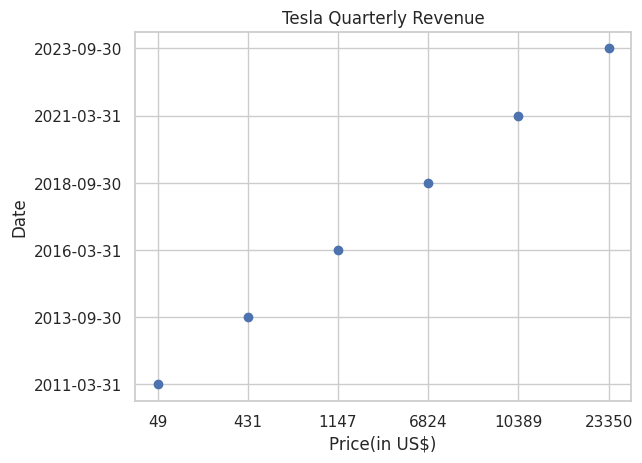

In [111]:
df_short = df.iloc[::10]
plt.scatter(df_short['Price'], df_short['Dates'])
plt.xlabel('Price(in US$)')
#plt.xticks([df_short['Price'].iloc[0], df_short['Price'].iloc[-1]])
plt.ylabel('Date')
#plt.yticks([df_short['Dates'].iloc[0], df_short['Dates'].iloc[-1]])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('Tesla Quarterly Revenue')

plt.show()


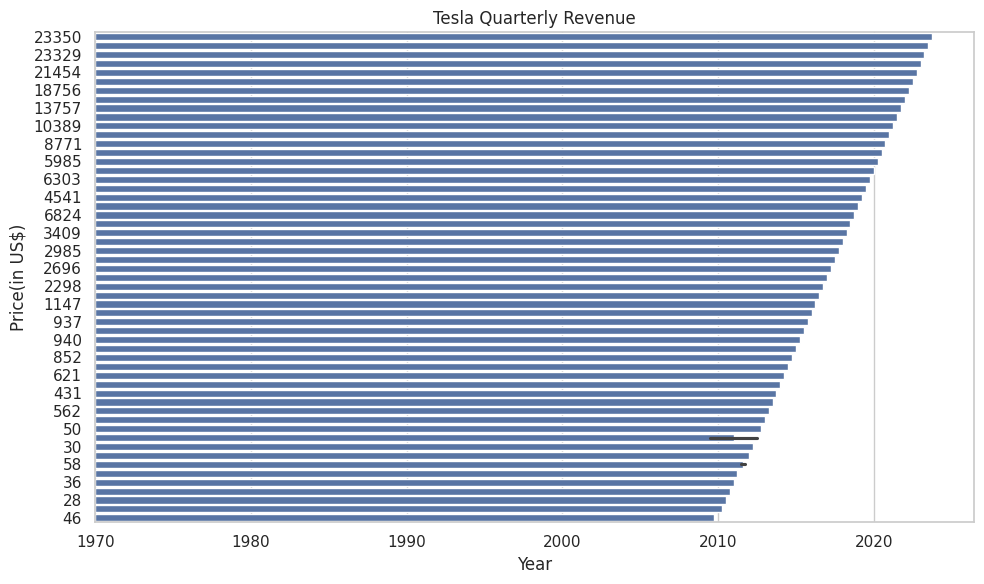

In [113]:
df['Dates'] = pd.to_datetime(df['Dates'])

# Crear un gráfico de barras usando Seaborn
sns.set(style="whitegrid")  # Estilo de la gráfica
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica

plot = sns.barplot(x='Dates', y='Price', data=df)

# Configurar etiquetas y título
plt.xlabel('Year')
plt.ylabel('Price(in US$)')
plt.title('Tesla Quarterly Revenue')


ticks = plot.get_yticks()
plot.set_yticks(ticks[::2])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

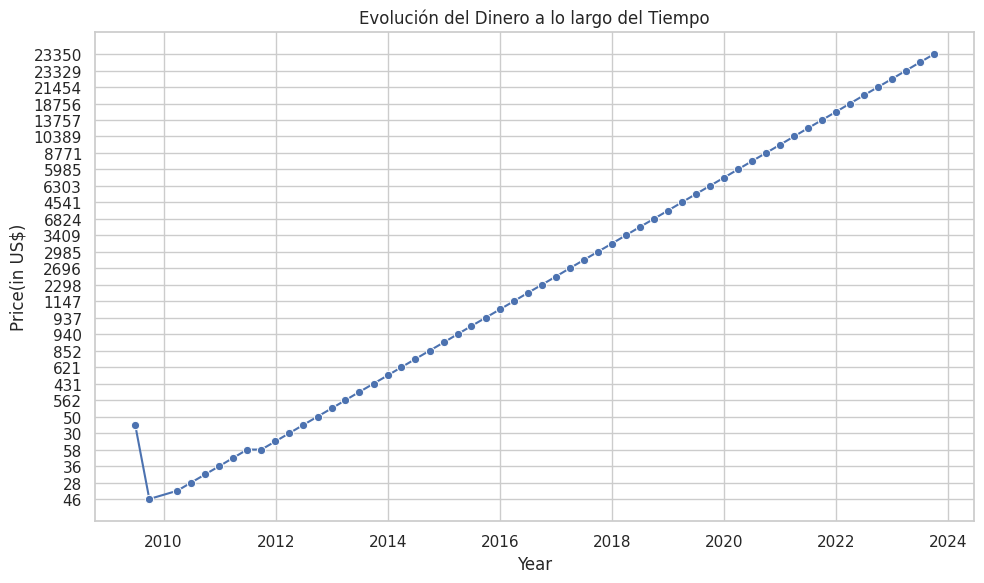

In [112]:
# Convertir la columna 'fechas' al formato datetime
df['Dates'] = pd.to_datetime(df['Dates'])

# Crear un gráfico de barras apiladas
sns.set(style="whitegrid")  # Estilo de la gráfica
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica


# Usar Seaborn para crear un gráfico de línea
plot = sns.lineplot(x='Dates', y='Price', data=df, marker='o')

# Configurar etiquetas y título
plt.xlabel('Year')
plt.ylabel('Price(in US$)')
plt.title('Evolución del Dinero a lo largo del Tiempo')


# Personalizar los ticks del eje y para mostrar solo la mitad de ellos
ticks = plot.get_yticks()
plot.set_yticks(ticks[::2])

# Mostrar el gráfico
plt.tight_layout()
plt.show()